In [57]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
sns.set_palette('rainbow')

In [15]:
data = pd.read_csv('spotify_tracks.csv')

In [3]:
data.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


In [4]:
pd.isnull(data).sum()

id             0
name           0
genre          0
artists        0
album          0
popularity     0
duration_ms    0
explicit       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


In [6]:
data.shape

(6300, 8)

In [7]:
#How many unique artists are there in the dataset?

In [8]:
data['artists'].nunique()

4651

In [9]:
#What are the most common genres?
data['genre'].value_counts()

genre
acoustic             50
new-age              50
punk                 50
psych-rock           50
progressive-house    50
                     ..
french               50
forro                50
folk                 50
emo                  50
world-music          50
Name: count, Length: 126, dtype: int64

In [42]:
most_popular_songs = data.query('popularity>80',inplace = False).sort_values('popularity', ascending = False)
most_popular_songs[:10]

,id,name,genre,artists,album,popularity,duration_ms,explicit
1567,2HYFX63wP3otVIvopRS99Z,Houdini,edm,Eminem,Houdini,90,227239,True
5540,0zirWZTcXBBwGsevrsIpvT,Clean Baby Sleep White Noise (Loopable),sleep,"Dream Supplier, Baby Sleeps, Background White ...",Best White Noise For Sleeping Baby,88,142222,False
2797,4Dvkj6JhhA12EX05fT7y2e,As It Was,house,Harry Styles,Harry's House,87,167303,False
3158,7CyPwkp0oE8Ro9Dd5CUDjW,"One Of The Girls (with JENNIE, Lily Rose Depp)",j-idol,"The Weeknd, JENNIE, Lily-Rose Depp",The Idol Episode 4 (Music from the HBO Origina...,87,244684,False
4746,7iabz12vAuVQYyekFIWJxD,BAND4BAND (feat. Lil Baby),r-n-b,"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),87,140733,True
3213,1aKvZDoLGkNMxoRYgkckZG,Magnetic,j-pop,ILLIT,SUPER REAL ME,86,160688,False
3356,1aKvZDoLGkNMxoRYgkckZG,Magnetic,k-pop,ILLIT,SUPER REAL ME,86,160688,False
4745,3xkHsmpQCBMytMJNiDf3Ii,Beautiful Things,r-n-b,Benson Boone,Fireworks & Rollerblades,86,180304,False
4610,4ZJ4vzLQekI0WntDbanNC7,Pink Skies,punk,Zach Bryan,Pink Skies,85,194920,False
4748,51eSHglvG1RJXtL3qI5trr,Slow It Down,r-n-b,Benson Boone,Fireworks & Rollerblades,85,161831,False


<Axes: xlabel='popularity', ylabel='Density'>

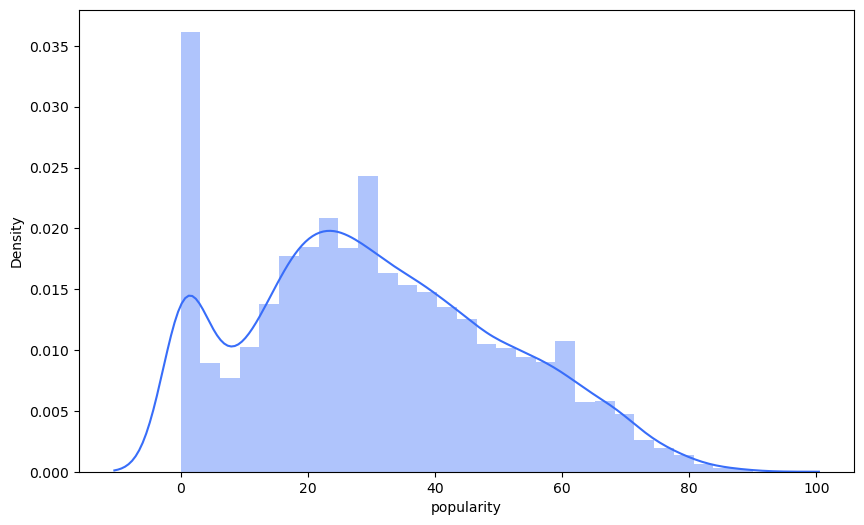

In [28]:
#How is the popularity of tracks distributed?
plt.figure(figsize=(10,6))
sns.distplot(data['popularity'])

In [11]:
# Distribution of popularity scores
popularity_distribution = data['popularity'].value_counts().sort_index()
print(popularity_distribution)

popularity
0     470
1     101
2      71
3      65
4      52
     ... 
85      2
86      3
87      3
88      1
90      1
Name: count, Length: 90, dtype: int64


# Distribution of track durations

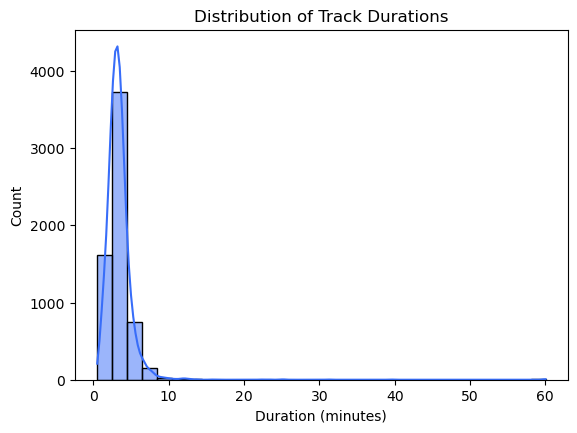

In [20]:
plt.figure(figsize = (14,10))
plt.subplot(2, 2, 1)
sns.histplot(data['duration_ms'] / 60000, bins=30, kde=True)
plt.title('Distribution of Track Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# Popularity by genre

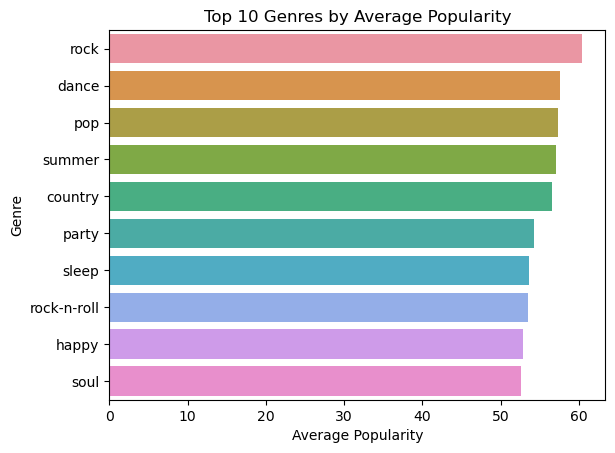

In [43]:

genre_popularity = data.groupby('genre')['popularity'].mean().sort_values(ascending = False).head(10)
sns.barplot(x=genre_popularity, y=genre_popularity.index)
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()

# Count of explicit vs non-explicit tracks

Text(0, 0.5, 'Count')

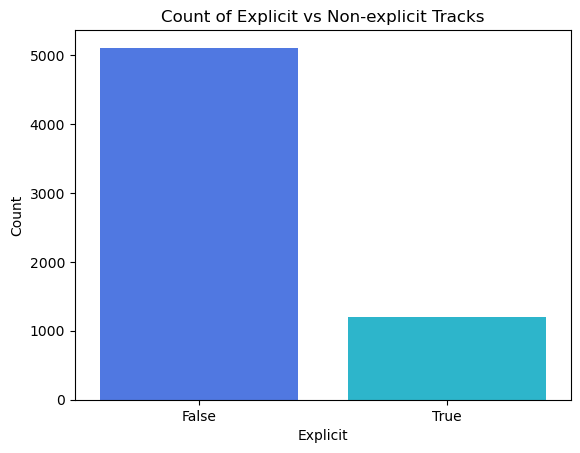

In [33]:

explicit_counts = data['explicit'].value_counts()
sns.barplot(x = explicit_counts.index, y = explicit_counts)
plt.title('Count of Explicit vs Non-explicit Tracks')
plt.xlabel('Explicit')
plt.ylabel('Count')

# Top 10 most popular tracks

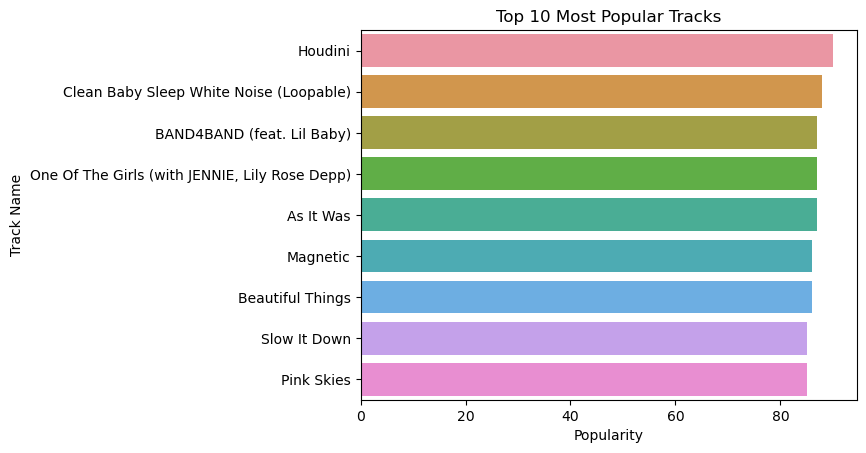

In [38]:
top_tracks = data[['name','popularity']].sort_values(by='popularity',ascending = False).head(10)
sns.barplot(x=top_tracks['popularity'], y=top_tracks['name'])
plt.title('Top 10 Most Popular Tracks')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.show()